In [6]:
from sympy import *
import sympy

In [4]:
x, y, z, t = symbols('x y z t')

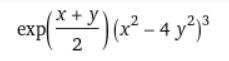

Сначала найдем частные производные:

In [5]:
dx = sympy.diff(exp((x+y)/2)*(x**2 - 4*y**2)**3, x)
dx

NameError: name 'sympy' is not defined

In [64]:
dy = sympy.diff(exp((x+y)/2)*(x**2 - 4*y**2)**3, y)
dy

-24*y*(x**2 - 4*y**2)**2*exp(x/2 + y/2) + (x**2 - 4*y**2)**3*exp(x/2 + y/2)/2

Проверка df/dxdy == df/dydx

In [65]:
sympy.diff(exp((x+y)/2)*(x**2 - 4*y**2)**3, x, y) == sympy.diff(exp((x+y)/2)*(x**2 - 4*y**2)**3, y, x)

True

Теперь каждую частную производную приравнять к нулю и составить систему, чтобы найти стационарные точки. https://www.wolframalpha.com/input/?i=%7Bd%2Fdy%28e%5E%28%28x%2By%29%2F2%29+*+%28x%5E+2+-4y%5E2%29%5E3%29%3D+0%2C+d%2Fdx%28e%5E%28%28x%2By%29%2F2%29+*+%28x%5E+2+-4y%5E2%29%5E3%29%3D+0%7D

Стационарные точки: M1(0, 0) M2(-16, 4)

Проверим достаточное условие экстремума в каждой точке:

In [82]:
dxx = sympy.diff(exp((x+y)/2)*(x**2 - 4*y**2)**3, x, x)
dxx

(x**2 - 4*y**2)*(30*x**2 + 6*x*(x**2 - 4*y**2) - 24*y**2 + (x**2 - 4*y**2)**2/4)*exp(x/2 + y/2)

In [83]:
dxy = sympy.diff(exp((x+y)/2)*(x**2 - 4*y**2)**3, x, y)
dxy

(x**2 - 4*y**2)*(-96*x*y + 3*x*(x**2 - 4*y**2) - 12*y*(x**2 - 4*y**2) + (x**2 - 4*y**2)**2/4)*exp(x/2 + y/2)

In [84]:
dyy = sympy.diff(exp((x+y)/2)*(x**2 - 4*y**2)**3, y, y)
dyy

(x**2 - 4*y**2)*(-24*x**2 + 480*y**2 - 24*y*(x**2 - 4*y**2) + (x**2 - 4*y**2)**2/4)*exp(x/2 + y/2)

Теперь находим значение AC-B^2, где A, B, C - соответствующие уравнения выше.

In [85]:
def find_out_extr(x1, y1):
    A = dxx.subs(x, x1).subs(y, y1)
    B = dxy.subs(x, x1).subs(y, y1)
    C = dyy.subs(x, x1).subs(y, y1)
    return A*C - B**2, A

In [86]:
x1 = 0
y1 = 0
find_out_extr(x1, y1)

(0, 0)

Про точку M1 ничего неизвестно.

In [87]:
x1 = -16
y1 = 4
find_out_extr(x1, y1)

(195689447424*exp(-12), -368640*exp(-6))

В точке M2 есть экстремум, и так как Ac - B^2 > 0, A < 0, то это максимум.